In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Overview of data

In [2]:
board = pd.read_csv('cardboard.csv')
commingled = pd.read_csv('commingled.csv')
organic = pd.read_csv('organic.csv')
poly = pd.read_csv("poly.csv")
master = pd.read_csv("master.csv")

In [3]:
print(board.shape)
print(commingled.shape) # identical twins
print(organic.shape) # identical twins
print(poly.shape)

print(master['date'].max())
print(master['date'].min())

(53, 10)
(366, 12)
(366, 7)
(53, 10)
12/01/2019 12:00:00 AM
01/01/2010 12:00:00 AM


In [4]:
# Quick analysis, 1 missing value spotted
print(len(commingled[commingled['Daily Estimated Net Weight (kg)'].isnull()]))
commingled.fillna(method= 'ffill', inplace = True)
commingled[commingled['Daily Estimated Net Weight (kg)'].isnull()]

1


,Day,Date,Number of 1100-litre bins filled,Time bin 1 spot check weight recorded,Time bin 2 spot check weight recorded,Time bin 3 spot check weight recorded,Time bin 4 spot check weight recorded,Time bin 5 spot check weight recorded,Daily Estimated Net Weight (kg),column 9,column 10,column 11


In [5]:
# 7 missing values spotted, use ffill(method)
print(len(organic[organic['Daily Estimated Net Weight (kg)'].isnull()]))
organic.fillna(method = 'ffill', inplace = True)
organic[organic['Daily Estimated Net Weight (kg)'].isnull()]

7


,Day,Date,Gross Weight: Bin 1 (kg),Gross Weight: Bin 2 (kg),Gross Weight: Bin 3 (kg),Gross Weight: Bin 4 (kg),Daily Estimated Net Weight (kg)


In [6]:
# Number of missing values relatively high, 23/53; therefore, not valuing greatly
print(len(poly[poly['Weekly Estimated Total (kg)'].isnull()]))
poly[poly['Weekly Estimated Total (kg)'].isnull()].head()

23


,Week Beginning Date,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Weekly Total (bags),Weekly Estimated Total (kg)
0,01/01/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/11/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,03/21/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,05/09/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,07/04/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
board[board['Estimated weight of cardboard (kg)'].isnull()] # Good quality

,Week Beginning Date,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Bales collected,Estimated weight of cardboard (kg)


In [8]:
master = pd.read_csv('master.csv')

In [9]:
master.head() # Good quality

,date,residential,public_litter_bins,dumped_rubbish,street_sweepings,mattresses,commingled_recycling,cardboard,hardwaste_to_landfill,hardwaste_recovered,hardwaste_total,green_waste,month
0,02/01/2015 12:00:00 AM,1867.96,365.13,179.25,307.66,312,558.96,151.02,89.50,0.00,89.50,2.70,February
1,05/01/2016 12:00:00 AM,2418.20,326.52,200.66,433.06,209,702.07,199.68,19.74,40.92,60.66,3.08,May
2,01/01/2015 12:00:00 AM,1958.38,328.79,147.72,345.68,501,642.18,132.66,85.52,0.00,85.52,3.52,January
3,02/01/2016 12:00:00 AM,2202.28,281.46,151.18,293.00,173,708.31,196.96,41.72,19.12,60.84,5.56,February
4,02/01/2011 12:00:00 AM,1644.12,300.24,138.70,530.52,117,512.66,176.48,23.80,0.00,23.80,6.54,February


# Data wrangling (for visualization and analysis)

In [10]:
print(commingled.columns)
print(organic.columns)
print(poly.columns)
print(board.columns)

Index(['Day', 'Date', 'Number of 1100-litre bins filled',
       'Time bin 1 spot check weight recorded',
       'Time bin 2 spot check weight recorded',
       'Time bin 3 spot check weight recorded',
       'Time bin 4 spot check weight recorded',
       'Time bin 5 spot check weight recorded',
       'Daily Estimated Net Weight (kg)', 'column 9', 'column 10',
       'column 11'],
      dtype='object')
Index(['Day', 'Date', 'Gross Weight: Bin 1 (kg)', 'Gross Weight: Bin 2 (kg)',
       'Gross Weight: Bin 3 (kg)', 'Gross Weight: Bin 4 (kg)',
       'Daily Estimated Net Weight (kg)'],
      dtype='object')
Index(['Week Beginning Date', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'Weekly Total (bags)',
       'Weekly Estimated Total (kg)'],
      dtype='object')
Index(['Week Beginning Date', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'Bales collected',
       'Estimated weight of cardboard (kg)'],
      d

In [11]:
# Classifying into daily and weekly datasets
day_data = [commingled, organic]
week_data = [poly, board]

In [12]:
# Functions to append the column month/week showing which month/week the instance is recorded
def classify_months(x):
    return x.month
def classify_weeks(x):
    return x.week
for dataset in day_data:
    dataset['Date'] = pd.to_datetime(dataset['Date'])
    dataset['month'] = 2000
    dataset['week'] = 2000
    dataset['month'] = dataset['Date'].apply(lambda x: classify_months(x))
    dataset['week'] = dataset['Date'].apply(lambda x: classify_weeks(x))
for dataset in week_data:
    dataset['Week Beginning Date'] = pd.to_datetime(dataset['Week Beginning Date'])
    dataset['week'] = 2000
    dataset['week'] = dataset['Week Beginning Date'].apply(lambda x: classify_weeks(x))

## 1. Merging daily datasets to create commingled_organic dataset

In [13]:
commingled_organic = pd.merge(commingled, organic, how = 'outer', on= 'Date')
commingled_organic['Date'] = pd.to_datetime(commingled_organic['Date'])
commingled_organic = commingled_organic[['Date', 'Daily Estimated Net Weight (kg)_x', 'Daily Estimated Net Weight (kg)_y']]
commingled_organic.rename({'Daily Estimated Net Weight (kg)_x': 'Amounts of commingled waste', 'Daily Estimated Net Weight (kg)_y': 'Amounts of organic waste'}, inplace = True, axis = 1)
commingled_organic['month'] = 999
commingled_organic['week']  = 999
commingled_organic['week'] = commingled_organic['Date'].apply(lambda x: classify_weeks(x))
commingled_organic['month'] = commingled_organic['Date'].apply(lambda x: classify_months(x))
commingled_organic


,Date,Amounts of commingled waste,Amounts of organic waste,month,week
0,2016-01-01,180.939,34.0,1,53
1,2016-01-02,60.313,35.7,1,53
2,2016-01-03,120.626,23.6,1,53
3,2016-01-04,241.252,169.5,1,1
4,2016-01-05,180.939,102.0,1,1
...,...,...,...,...,...
361,2016-12-27,180.939,77.1,12,52
362,2016-12-28,180.939,101.2,12,52
363,2016-12-29,180.939,113.5,12,52
364,2016-12-30,241.252,95.1,12,52


## 2. Merging weekly dataset to create board_poly dataset

In [14]:
# merging weekly dataset to create board_poly dataset

# Adding week and month column 
board_poly = pd.merge(board, poly, how = 'outer', on= 'Week Beginning Date')
board_poly = board_poly[['Week Beginning Date', 'Weekly Estimated Total (kg)', 'Estimated weight of cardboard (kg)']]
board_poly['Week Beginning Date'] = pd.to_datetime(board_poly['Week Beginning Date'])
board_poly['month'] = 999
board_poly['week']  = 999

board_poly['week'] = board_poly['Week Beginning Date'].apply(lambda x: classify_weeks(x))
board_poly['month'] = board_poly['Week Beginning Date'].apply(lambda x: classify_months(x))

# Filling nan values
mean_value = np.nanmean(board_poly['Weekly Estimated Total (kg)'])
board_poly.fillna(mean_value, inplace = True)


board_poly_week = board_poly.groupby('month').sum()[['Weekly Estimated Total (kg)', 'Estimated weight of cardboard (kg)']]

In [15]:
new = board_poly_week.copy()
new.rename({"Weekly Estimated Total (kg)": "Estimated Polystyrene Total (kg)"}, axis = 1)

,Estimated Polystyrene Total (kg),Estimated weight of cardboard (kg)
month,,
1,53.226667,7250
2,83.850000,8250
3,58.863333,7000
4,25.800000,7250
5,91.113333,8000
6,51.600000,6250
7,79.026667,6500
8,50.200000,9250
9,54.853333,6000


## 3. Preparing dataset for pie chart

In [16]:
# Preparing for pie charts
total_commingled_2016 = commingled_organic['Amounts of commingled waste'].sum(axis = 0)
total_organic_2016 = commingled_organic['Amounts of organic waste'].sum(axis = 0)
total_poly_2016 = board_poly['Weekly Estimated Total (kg)'].sum(axis = 0)
total_cardboard_2016 = board_poly['Estimated weight of cardboard (kg)'].sum(axis = 0)
values = [total_commingled_2016, total_organic_2016, total_poly_2016, total_cardboard_2016]
waste_categories = ['commingled waste', 'Organic waste', 'Polystyrene', 'Cardboard']

## 4. Combining the city of Melbourne dataset in 2016 with datasets of Degraves Center to show the center's recycling rate with regard to City of Melbourne

In [17]:
master = pd.read_csv("master.csv")
master['date'] = pd.to_datetime(master['date'])
master['year'] = 0
def classify_years(x):
    return x.year
master['year'] = master['date'].apply(lambda x: classify_years(x))

In [18]:
master_year = master.groupby('year').sum()[:-1]
master_2016 = master[master['year'] == 2016]
dict_replace = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 
    "August": 8, 'September': 9 , 'October': 10, 'November': 11, 'December':12
}
master_2016 = master_2016.replace(dict_replace)
master_2016.set_index('month', inplace = True)

commingled_organic_monthly = commingled_organic.groupby('month').sum()
commingled_organic_monthly.reset_index()
comparison = commingled_organic.groupby('month').sum()
comparison = comparison.join(board_poly_week[['Estimated weight of cardboard (kg)']], how = 'left')
comparison.rename({"Estimated weight of cardboard (kg)": "Total_cardboard_2016"}, axis = 1, inplace = True)
comparison = comparison.join(master_2016[['commingled_recycling', 'green_waste', 'cardboard']], 
                             how = 'left').drop(['week'], axis = 1)
comparison['%commingled'] = comparison['Amounts of commingled waste'] / comparison['commingled_recycling'] / 1000 * 100
comparison['%cardboard'] = comparison['Total_cardboard_2016'] / comparison['cardboard'] / 1000 * 100
comparison['%organic'] = comparison['Amounts of organic waste'] / comparison['green_waste'] / 1000 * 100 * 7/(7+7+35)
comparison

,Amounts of commingled waste,Amounts of organic waste,Total_cardboard_2016,commingled_recycling,green_waste,cardboard,%commingled,%cardboard,%organic
month,,,,,,,,,
1,5669.422,3157.6,7250,715.00,3.60,176.38,0.792926,4.110443,12.530159
2,5005.979,3180.3,8250,708.31,5.56,196.96,0.706750,4.188668,8.171377
3,5548.796,3471.8,7000,749.20,1.68,201.34,0.740629,3.476706,29.522109
4,5729.735,2994.5,7250,672.57,5.28,189.00,0.851917,3.835979,8.102002
5,5367.857,2787.3,8000,702.07,3.08,199.68,0.764576,4.006410,12.928108
6,5005.979,2773.9,6250,668.04,3.32,201.04,0.749353,3.108834,11.935886
7,5367.857,3103.2,6500,642.76,3.94,228.58,0.835126,2.843643,11.251632
8,4825.040,2820.0,9250,662.92,3.30,213.28,0.727846,4.337022,12.207792
9,4945.666,2443.3,6000,625.22,4.38,210.16,0.791028,2.854968,7.969015


## 6. Merging datasets for area chart

In [19]:
area = commingled_organic_monthly.iloc[:, [0,1]].join(board_poly_week.iloc[:, [0,1]])
area.columns = ['commingled', 'organic', 'polystyrene', 'cardboard']

## Visualization

## 1.Time series plot (monthly) of Degraves Center in 2016

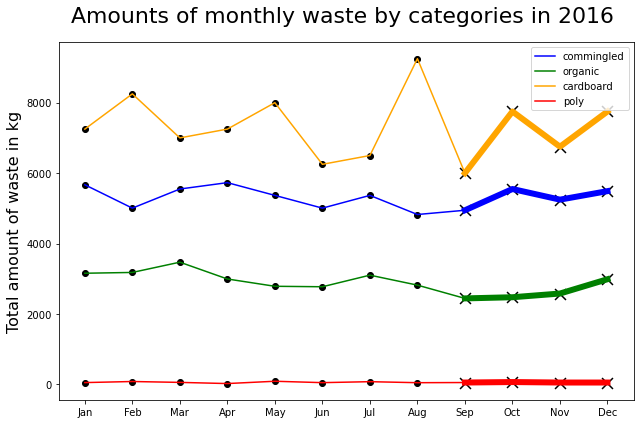

In [20]:
# Use 2 datasets created  before: commingled_organic_monthly and board_poly_week

def plot_time_series(lst):
    dataset = lst[0]
    column  = lst[1]
    label = lst[2]
    color = lst[3]
    plt.plot(dataset.index, dataset[column], color = color, label = label)
    plt.scatter(dataset.index[:8], dataset[column][:8], color = 'black')
    plt.scatter(dataset.index[8:], dataset[column][8:], color = 'black', marker = 'x', s = 120)  
    plt.plot(dataset.index[8:], dataset[column][8:], color = color, linewidth = 6)
    
#commingled_organic_monthly = commingled_organic.groupby('month').sum()
plt.figure(figsize = (9,6))


drawing_commingled = (commingled_organic_monthly, 'Amounts of commingled waste', 'commingled', 'blue')
drawing_organic = (commingled_organic_monthly, 'Amounts of organic waste' , 'organic', 'green')
drawing_cardboard = (board_poly_week, 'Estimated weight of cardboard (kg)', 'cardboard', 'orange')
drawing_poly = (board_poly_week, 'Weekly Estimated Total (kg)', 'poly', 'red')
major_lst = [drawing_commingled, drawing_organic, drawing_cardboard, drawing_poly]
for ele in major_lst:
    plot_time_series(ele)

plt.ylabel("Total amount of waste in kg", fontsize = 16)
plt.title("Amounts of monthly waste by categories in 2016 ", fontsize = 22, pad = 20)
plt.xticks(np.arange(1,13),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(prop={'size': 10})
plt.tight_layout()
plt.savefig("Time series plot 2016 by categories")

## 2. Area chart (monthly) of Degraves Center in 2016

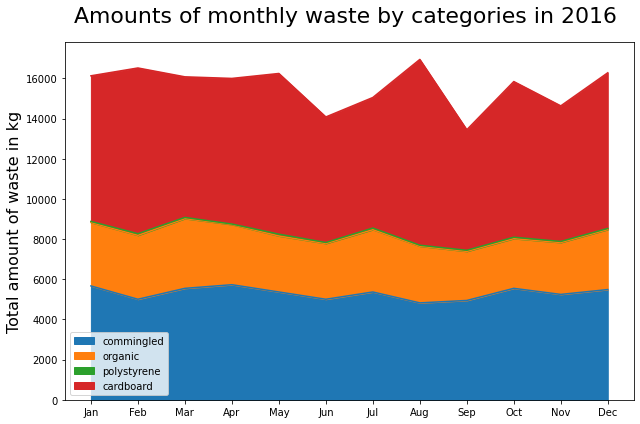

In [21]:
# Utilise the dataset created before: area

ax = area.plot.area(figsize = (9,6), stacked = True)
plt.xticks(np.arange(1,13),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel("Total amount of waste in kg", fontsize = 16)
plt.title("Amounts of monthly waste by categories in 2016 ", fontsize = 22, pad = 20)
plt.xlabel("")
plt.legend(prop={'size': 10})
plt.tight_layout()
plt.savefig("Area chart 2016")

## 3. Pie chart showing the breakdown of waste in Degraves Center

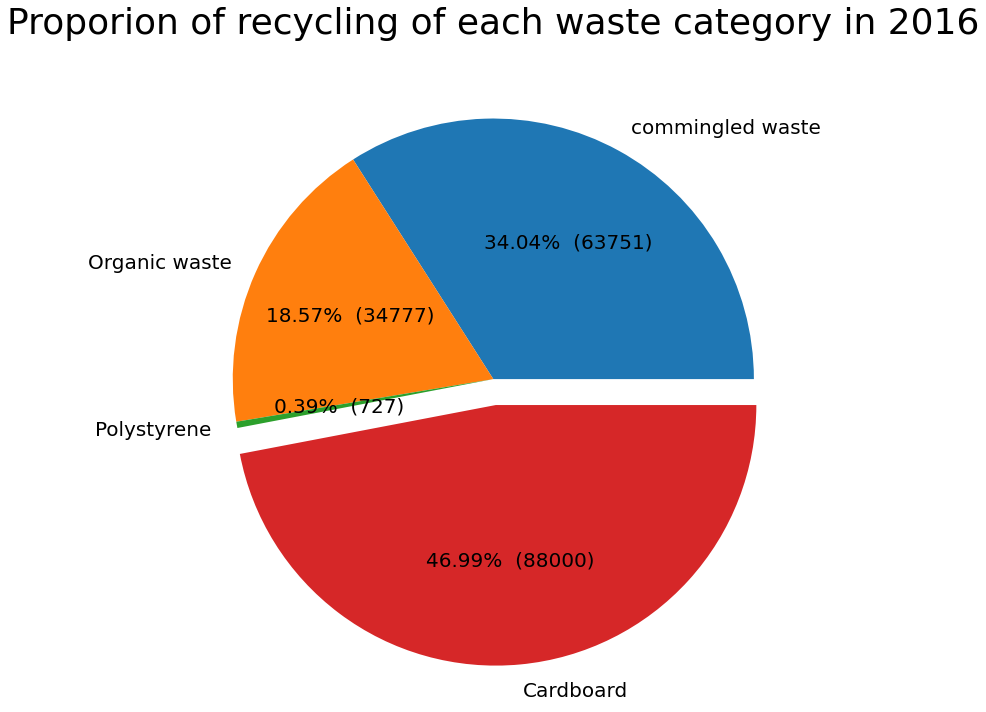

In [22]:
# Creating a bar chart to ananlyze recycling center's proportion based on the total amount of waste
"""total_commingled_2016 = commingled_organic['Amounts of commingled waste'].sum(axis = 0)
total_organic_2016 = commingled_organic['Amounts of organic waste'].sum(axis = 0)
total_poly_2016 = board_poly['Weekly Estimated Total (kg)'].sum(axis = 0)
total_cardboard_2016 = board_poly['Estimated weight of cardboard (kg)'].sum(axis = 0)
values = [total_commingled_2016, total_organic_2016, total_poly_2016, total_cardboard_2016]
waste_categories = ['commingled waste', 'Organic waste', 'Polystyrene', 'Cardboard']
"""

def make_piechart(values):
    def piechart(prop):
        total_sum = sum(values)
        value = int(round(total_sum * prop /100.0))
        return '{prop:.2f}%  ({value:d})'.format(prop=prop,value=value)
    return piechart
explode = (0,0,0,0.1)
plt.figure(figsize = (16,10))
plt.title("Proporion of recycling of each waste category in 2016", fontsize = 36, pad = 20)
plt.pie(values, explode= explode, labels = waste_categories, autopct= make_piechart(values), textprops={'fontsize': 20})
plt.savefig("Breakdown of waste")
plt.tight_layout()
plt.show()


## 4. Assumptions about tourist season

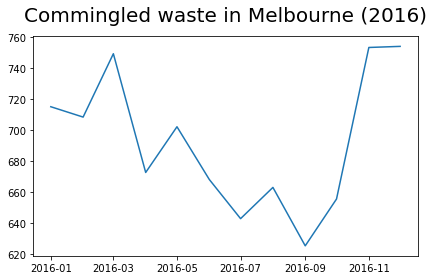

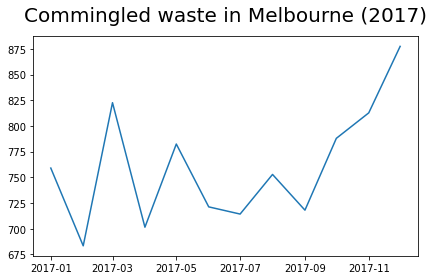

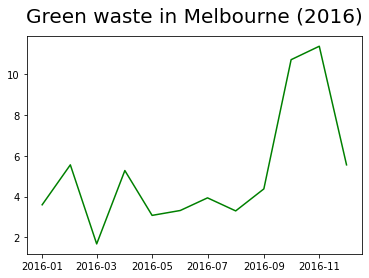

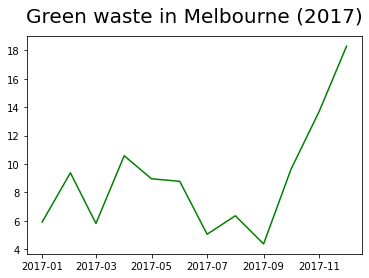

In [23]:
# showcase the trends for commingledd waste and green waste

master.sort_values('date', inplace = True)
for i in range(2016,2018):
    
    answer = master[master['year'] == i][['date', 'commingled_recycling']]
    plt.figure()
    plt.plot(answer['date'], answer['commingled_recycling'])
    plt.title(f"Commingled waste in Melbourne ({i})",  fontsize = 20, pad = 15)
    #plt.ylabel("Tons", fontsize = 15)
    plt.tight_layout()
    plt.savefig(f"Commingled waste in Melbourne ({i})")
    
for i in range(2016,2018):
    answer = master[master['year'] == i][['date', 'green_waste']]
    plt.figure()
    plt.plot(answer['date'], answer['green_waste'], color = 'green')
    plt.title(f"Green waste in Melbourne ({i})",  fontsize = 20, pad = 15)
    plt.savefig(f"Green waste in Melbourne ({i})")

## 5. Proportion of waste processed by Degraves with regard to the total amount of waste in Melbourne

In [24]:
comparison.head()

,Amounts of commingled waste,Amounts of organic waste,Total_cardboard_2016,commingled_recycling,green_waste,cardboard,%commingled,%cardboard,%organic
month,,,,,,,,,
1,5669.422,3157.6,7250,715.00,3.60,176.38,0.792926,4.110443,12.530159
2,5005.979,3180.3,8250,708.31,5.56,196.96,0.706750,4.188668,8.171377
3,5548.796,3471.8,7000,749.20,1.68,201.34,0.740629,3.476706,29.522109
4,5729.735,2994.5,7250,672.57,5.28,189.00,0.851917,3.835979,8.102002
5,5367.857,2787.3,8000,702.07,3.08,199.68,0.764576,4.006410,12.928108


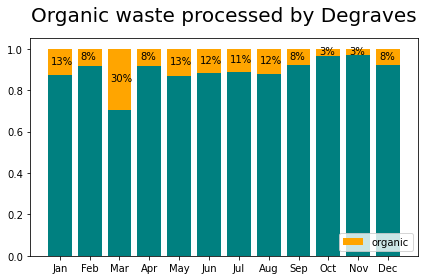

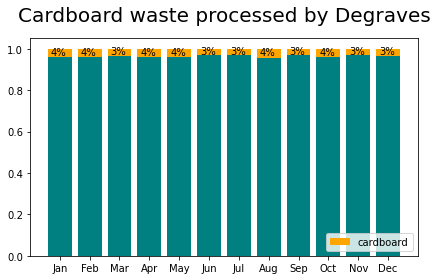

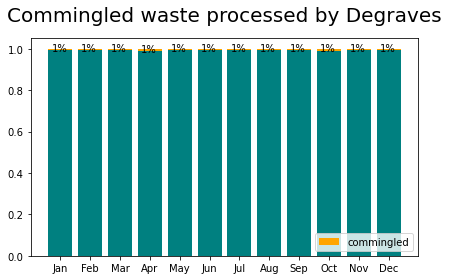

In [25]:
def drawing_bar_chart(comparison, column):
    plt.figure()
    plt.bar(np.arange(12), np.ones(12)-comparison[f'%{column}']/100, color = 'teal')
    plt.bar(np.arange(12), comparison[f'%{column}']/100, bottom = np.ones(12)-comparison[f'%{column}']/100, color = 'orange', label = column, )
    #plt.text(np.arange(12), comparison['%organic']/100, 'hi')
    lst1 = list(np.arange(12))
    lst2 = list(1 - comparison[f'%{column}']/100/2)

    for i in range(len(lst1)):
        data = comparison[f'%{column}'][i+1]
        plt.text(lst1[i]-0.30, lst2[i]-0.01, f"{data:.0f}%", size = 10)

for ele in ('organic', 'cardboard', 'commingled'):
    drawing_bar_chart(comparison, ele)
    plt.xticks(np.arange(0,12),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend(prop={"size":10}, loc = 4)
    plt.title(f"{ele.capitalize()} waste processed by Degraves", fontsize = 20, pad = 17)
    plt.tight_layout()
    plt.savefig(f"{ele} contribution by Degraves")

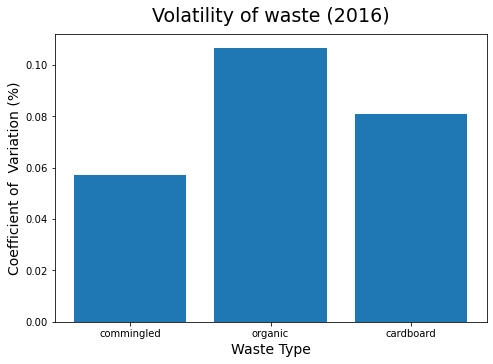

In [26]:
CV = {
    "commingled": comparison["Amounts of commingled waste"].std() / comparison["Amounts of commingled waste"].mean(),
    "organic": comparison['Amounts of organic waste'].std() / comparison['Amounts of organic waste'].mean(),
    "cardboard": comparison['cardboard'].std() / comparison['cardboard'].mean()
}
fig = plt.figure()
ax = fig.add_axes([0, 1, 1, 1])
waste_type = list(CV.keys())
fl = list(CV.values())
ax.bar(waste_type, fl)
plt.title("Volatility of waste (2016)", fontsize=19, pad=12)
plt.xlabel("Waste Type", fontsize=14)
plt.ylabel("Coefficient of  Variation (%)", fontsize=14)
plt.savefig("Volatility of waste")

# Machine learning - Regression

# 1. Future prediction for amounts of each waste category

## a. Data preparation for model training

In [27]:
master

,date,residential,public_litter_bins,dumped_rubbish,street_sweepings,mattresses,commingled_recycling,cardboard,hardwaste_to_landfill,hardwaste_recovered,hardwaste_total,green_waste,month,year
102,2009-04-01,1304.31,316.02,136.30,494.10,21,418.33,162.76,8.62,0.00,8.62,2.93,April,2009
5,2009-05-01,1249.74,330.36,169.98,691.28,0,376.02,168.52,14.82,0.00,14.82,2.79,May,2009
44,2009-06-01,1333.32,350.90,158.92,621.90,15,393.62,181.44,14.92,0.00,14.92,2.75,June,2009
70,2009-07-01,1405.98,389.32,149.02,605.42,125,397.68,181.80,16.26,0.00,16.26,3.18,July,2009
51,2009-08-01,1364.62,371.38,227.50,534.48,0,429.20,176.96,14.20,0.00,14.20,2.88,August,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2019-11-01,2662.94,334.60,89.04,310.10,422,748.99,106.64,76.18,29.93,106.11,10.76,November,2019
130,2019-12-01,2738.82,354.56,89.20,286.62,654,903.12,72.22,84.68,35.11,119.79,11.14,December,2019
131,2020-01-01,2608.78,379.94,99.44,293.90,460,872.40,74.58,99.50,27.28,126.78,9.06,January,2020
120,2020-02-01,2382.83,257.94,75.08,229.20,577,826.52,66.46,94.82,32.61,127.43,10.78,February,2020


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

y = master[['commingled_recycling']]

num_columns = list(master[['date']])
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')), # Prepare for future missing values
    ('standard_scaler', StandardScaler())
])

pipeline = ColumnTransformer([
    ('numerical_values', num_pipeline, num_columns)
])
X = pipeline.fit_transform(master) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/10, random_state = 0)

## b. Training

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

linreg = LinearRegression()
svr = SVR(kernel= 'poly', degree= 2)
rf = RandomForestRegressor(random_state= 0)


linreg.fit(X_train, y_train.values.ravel())
svr.fit(X_train, y_train.values.ravel())
rf.fit(X_train, y_train.values.ravel())


RandomForestRegressor(random_state=0)

## c. Evaluation

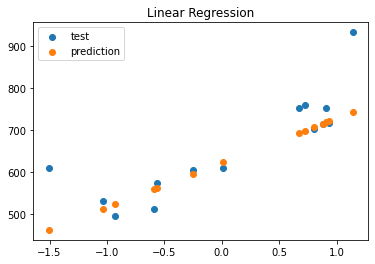

In [30]:
plt.scatter(X_test, y_test, label = 'test')
plt.scatter(X_test, linreg.predict(X_test), label = 'prediction')
plt.legend()
plt.title("Linear Regression")
plt.savefig('Linreg')

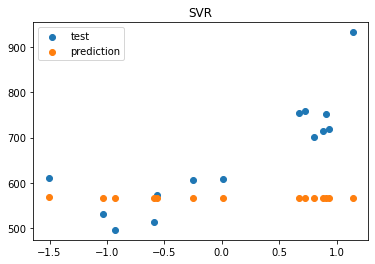

In [31]:
plt.scatter(X_test, y_test, label = 'test')
plt.scatter(X_test, svr.predict(X_test), label = 'prediction')
plt.legend()
plt.title("SVR")
plt.savefig('SVR')

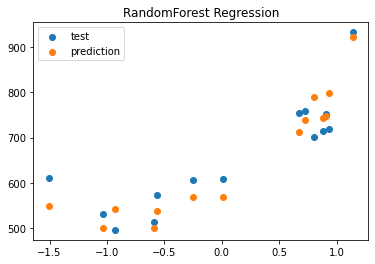

In [32]:
plt.scatter(X_test, y_test, label = 'test')
plt.scatter(X_test, rf.predict(X_test), label = 'prediction')
plt.legend()
plt.title("RandomForest Regression")
plt.savefig("RandomForest Regression")
plt.show()

## d. Tuning hyperparameters

In [33]:
# fine-tune model
params = [
    {'n_estimators': [5,10,15], 'max_depth' : [2,4,6]}
]
rf = RandomForestRegressor()
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(rf, param_grid= params, scoring = 'neg_mean_squared_error', cv = 5, return_train_score= True)
grid.fit(X_train, y_train.values.ravel())
grid.best_params_

{'max_depth': 6, 'n_estimators': 15}

In [34]:
rf = RandomForestRegressor(n_estimators= 15, max_depth= 6)
rf.fit(X_train, y_train.values.ravel())
y_test = rf.predict(X_test)

## e. Re-evaluation

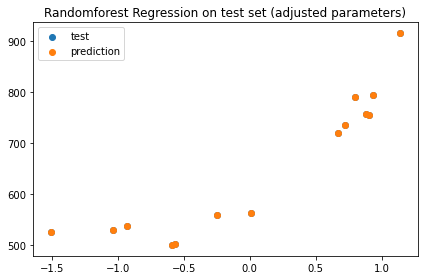

In [35]:
plt.scatter(X_test, y_test, label = 'test')
plt.scatter(X_test, rf.predict(X_test), label = 'prediction')
plt.legend()
plt.title("Randomforest Regression on test set (adjusted parameters)")
plt.tight_layout()
plt.savefig("Tuning")
plt.show()

# f. Future prediction

In [36]:
sample_test = master.copy()
sample_test = sample_test.iloc[:1, :]
sample_test['date'] = pd.to_datetime("2017-05-01")

sample_test_transformed = pipeline.transform(sample_test)
sample_test_transformed
commingled_2017 = rf.predict(sample_test_transformed)

# 2. Given an amount of waste of each category, predict proportion

## a. Overview  of dataset

array([[ 1.        , -0.62922935],
       [-0.62922935,  1.        ]])

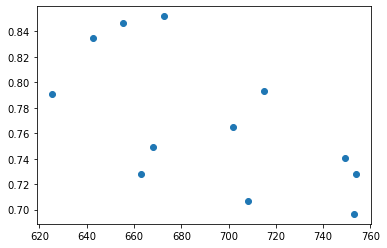

In [37]:
comparison
plt.scatter(comparison['commingled_recycling'], comparison['%commingled'])
np.corrcoef(comparison['commingled_recycling'], comparison['%commingled'])

## b. Training 

In [38]:
# Data Preparation is no longer required because of data wrangling methods in advance
# Building models
from sklearn.linear_model import LinearRegression
X = comparison[['commingled_recycling']].values
y = comparison[['%commingled']].values
linreg_percent = LinearRegression()
linreg_percent.fit(X, y)


LinearRegression()

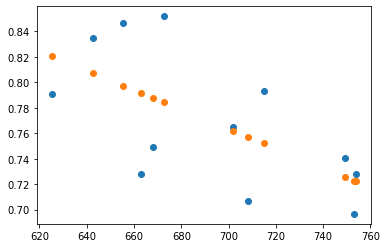

In [39]:
plt.scatter(comparison['commingled_recycling'], comparison['%commingled'])
plt.scatter(comparison['commingled_recycling'], linreg_percent.predict(X))

In [40]:
# Prediction
proportion_2017 = linreg_percent.predict([commingled_2017])
proportion_2017

array([[0.70454982]])

# Limitations
1. Model performs very well on test set
2. Too small amount of data for random foreest regression, might lead to overfitting
2. Too small amount of data for this recycling data --> if more data is collected, then can make predictions for more distant future (2030) --> nly make prediction ofr 2017
3. In the future, when we have more data --> can predict even further and make assumptiosn about this dataset